<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/reach_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


By Carli Beisel

Created August 2024

Purpose: Calculates open-water evapiration for irrigation systems in Mason using IDWR monthly open-water evaporation estimates.


In [ ]:
#-------------------------------------------#
#     Import Packages & Connect to Drive    #
#-------------------------------------------#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = pd.read_csv('/content/drive/MyDrive/Data/Mason Water Budget/data_input/pet/reach_pet.csv')
reach_pet = file['PET (af/month)']
reaches = file['Reach']
months = file['Month']

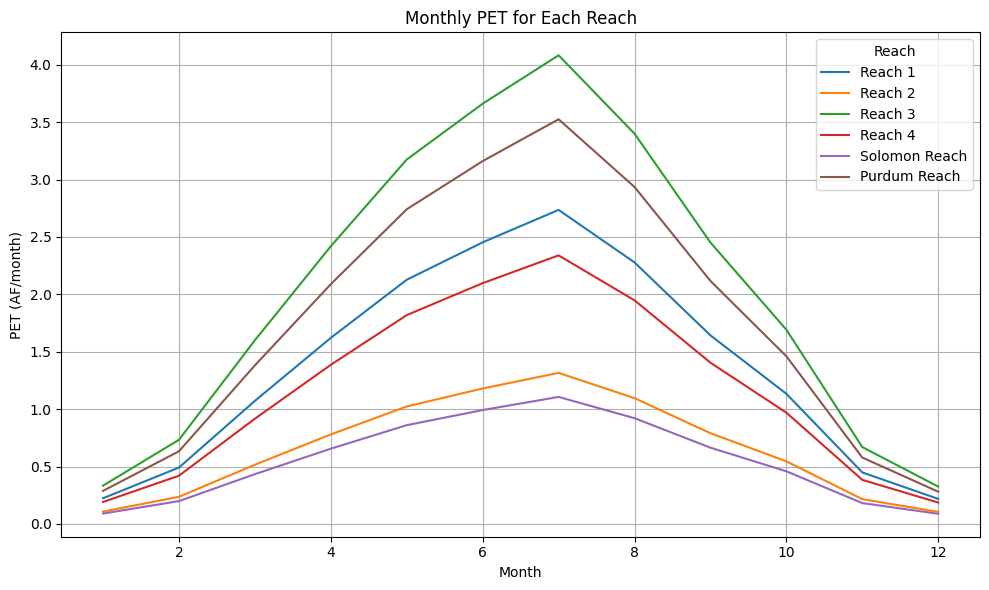

In [ ]:
# Create a plot
plt.figure(figsize=(10, 6))

# Plot PET for each reach
for reach in reaches.unique():
    reach_data = file[file['Reach'] == reach]
    plt.plot(reach_data['Month'], reach_data['PET (af/month)'], label=reach)

# Customize the plot
plt.title('Monthly PET for Each Reach')
plt.xlabel('Month')
plt.ylabel('PET (AF/month)')
plt.legend(title='Reach', loc='upper right')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

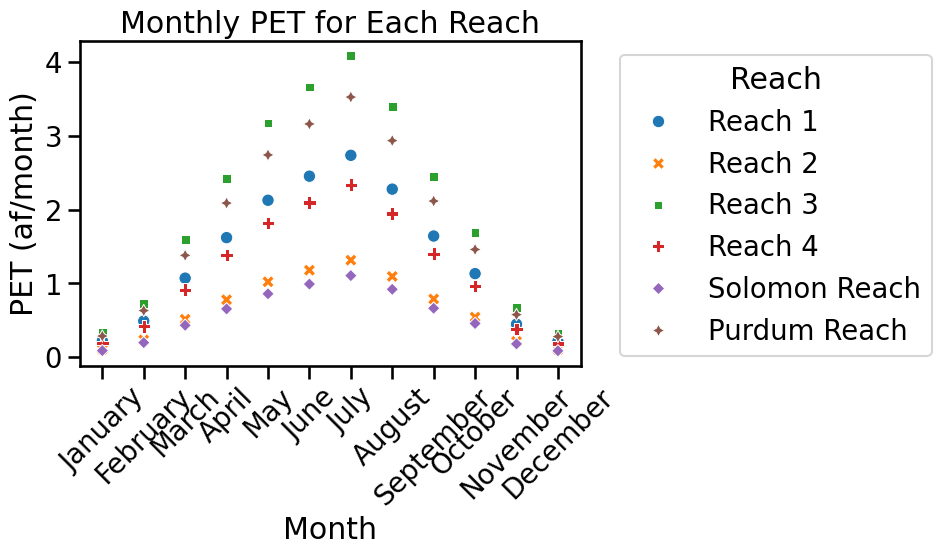

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a dictionary to map month numbers to month names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Map the 'Month' column using the month_map dictionary
file['Month'] = file['Month'].map(month_map)

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=file, x='Month', y='PET (af/month)', hue='Reach', style='Reach', s=80)

# Customize the plot
plt.title('Monthly PET for Each Reach')
plt.xlabel('Month')
plt.ylabel('PET (af/month)')

# Move the legend outside of the plot
plt.legend(title='Reach', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Budget/reach_pet.png', dpi=300, bbox_inches='tight')